In [1]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pandas as pd
import numpy as np
import os
import pathlib
import sys

In [2]:
anno_dir = "Task1 Complete"
anno_parent_path = pathlib.Path("Z:\Shared\Documents\RD\RD2\_AudioRD\datasets\Biosignals\CritiasStress\data_derivatives\Stage_ltallon\Task1")
anno_path = os.path.join(anno_parent_path, anno_dir)

In [3]:
txt_file_paths = [os.path.join(anno_path, f) for f in os.listdir(anno_path) if ".txt" in f]

In [4]:
wav_file_paths = [os.path.join(anno_parent_path, f) for f in os.listdir(anno_parent_path) if ".wav" in f]

In [5]:
list_df = []
for p in txt_file_paths:
    #a = np.genfromtxt(p,delimiter='\t',dtype=str)
    df = pd.read_table(p, header=None)
    if "ZephyrEcg" in p:
        df["signal"] = "ZephyrEcg"
    else:
        df["signal"] = "TiPpg"
    list_df.append(df)

In [6]:
both_df = pd.concat(list_df, ignore_index=True)

In [7]:
task_df = both_df[both_df.iloc[:,2]=="to_label"].iloc[:,0:3].drop_duplicates()

C:\Users\dbenesch\.conda\envs\stress-requirements\lib\site-packages\pandas\core\frame.py:6248: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  diff = Index(subset).difference(self.columns)


In [8]:
task_df

,0,1,2
5088,180.28902,360.289020,to_label
5089,728.03634,908.036340,to_label
5090,1277.518587,1457.518587,to_label
5091,1568.5206,1748.520600,to_label
5092,2014.254475,2194.254475,to_label
5093,2303.009507,2483.009507,to_label


In [9]:
R_Peak = np.unique(np.sort(both_df[both_df.iloc[:,2]=="R_Peak"].iloc[:,0].values)).astype(float)
SP = np.unique(np.sort(both_df[both_df.iloc[:,2]=="SP"].iloc[:,0].values)).astype(float)

In [10]:
R_Peak

array([2.89669000e-01, 1.18000000e+00, 2.12762500e+00, ...,
       4.67221650e+03, 4.67321900e+03, 4.67421738e+03])

In [11]:
len(task_df)

6

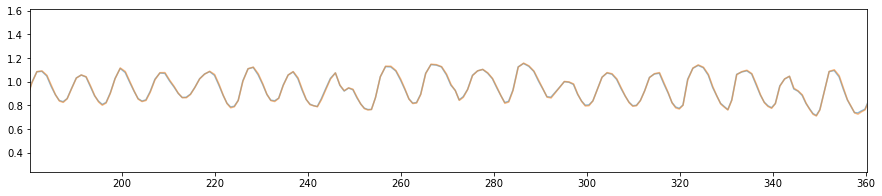

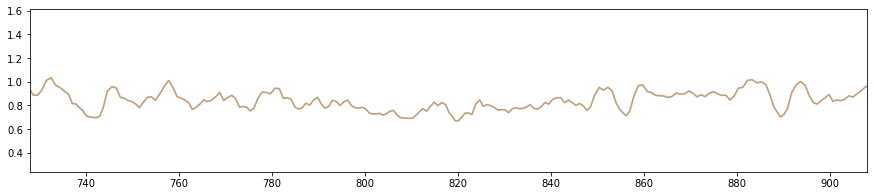

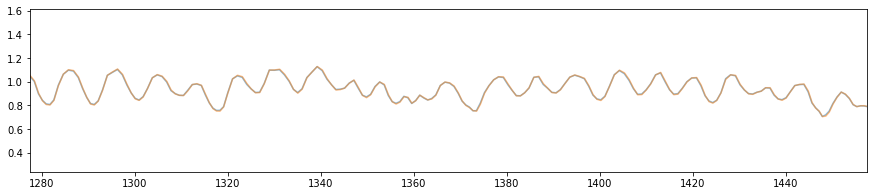

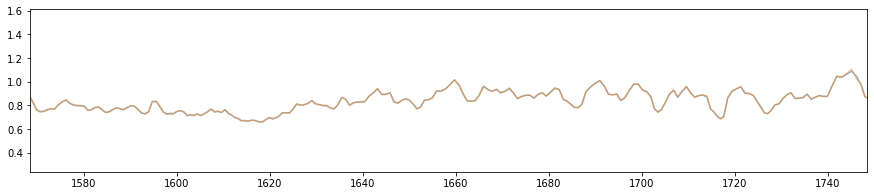

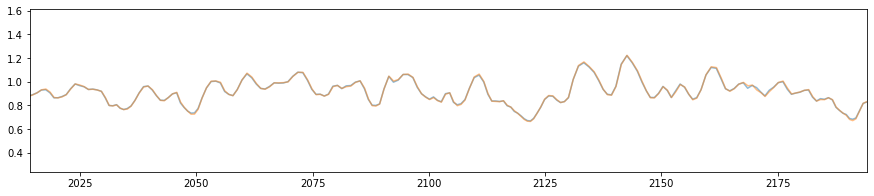

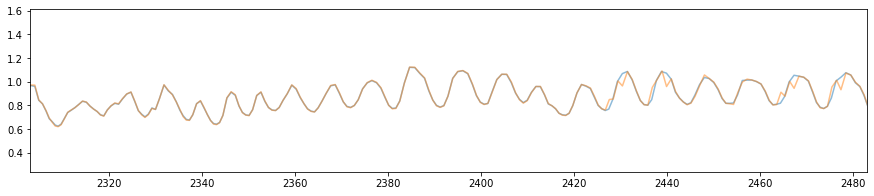

In [12]:
for i in range(len(task_df)):
    plt.figure(figsize=(15,3))
    plt.plot(R_Peak[1:],np.diff(R_Peak),alpha=0.5)
    plt.plot(SP[1:],np.diff(SP),alpha=0.5)
    plt.xlim([task_df.iloc[i,0],task_df.iloc[i,1]])
    plt.show()

In [13]:
out_list = []
for f in wav_file_paths:
    out_list.append(wavfile.read(f))

In [14]:
wav_file_paths

['Z:\\Shared\\Documents\\RD\\RD2\\_AudioRD\\datasets\\Biosignals\\CritiasStress\\data_derivatives\\Stage_ltallon\\Task1\\P5_Stress-P06-TiPpg-Sig-Raw.wav',
 'Z:\\Shared\\Documents\\RD\\RD2\\_AudioRD\\datasets\\Biosignals\\CritiasStress\\data_derivatives\\Stage_ltallon\\Task1\\P5_Stress-P06-ZephyrEcg-Sig-Raw.wav']

In [15]:
ppg_fs = out_list[0][0]
ppg_signal = out_list[0][1]
ppg_time = np.arange(0, len(ppg_signal))/ppg_fs
ecg_fs = out_list[1][0]
ecg_signal = out_list[1][1]
ecg_time = np.arange(0, len(ecg_signal))/ecg_fs


In [16]:
ecg_fs

8000

(-5824.0, -34.0)

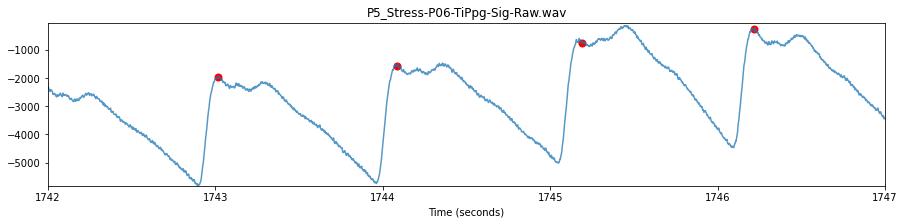

In [21]:
st = 1742
en = 1747
plt.figure(figsize=(15,3))
plt.plot(ppg_time[st*ppg_fs:en*ppg_fs], ppg_signal[st*ppg_fs:en*ppg_fs], alpha=0.75)
plt.scatter(SP, ppg_signal[np.round(SP*ppg_fs).astype(int)],color="red", linewidth=2)
plt.title(os.path.basename(wav_file_paths[0]))
plt.xlabel("Time (seconds)")
plt.xlim([st, en])
plt.ylim([np.min(ppg_signal[st*ppg_fs:en*ppg_fs]), np.max(ppg_signal[st*ppg_fs:en*ppg_fs]) + 100])

(-17882.0, -8068.0)

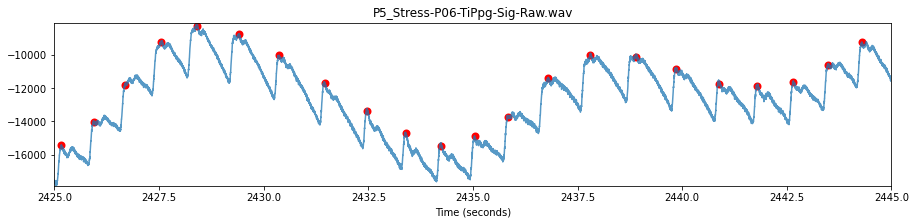

In [22]:
st = 2425
en = 2445
plt.figure(figsize=(15,3))
plt.plot(ppg_time[st*ppg_fs:en*ppg_fs], ppg_signal[st*ppg_fs:en*ppg_fs], alpha=0.75)
plt.scatter(SP, ppg_signal[np.round(SP*ppg_fs).astype(int)],color="red", linewidth=2)
plt.title(os.path.basename(wav_file_paths[0]))
plt.xlabel("Time (seconds)")
plt.xlim([st, en])
plt.ylim([np.min(ppg_signal[st*ppg_fs:en*ppg_fs]), np.max(ppg_signal[st*ppg_fs:en*ppg_fs]) + 100])

(-12694.0, -8068.0)

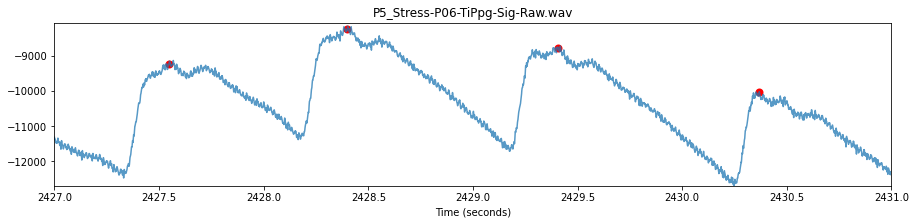

In [23]:
st = 2427
en = 2431
plt.figure(figsize=(15,3))
plt.plot(ppg_time[st*ppg_fs:en*ppg_fs], ppg_signal[st*ppg_fs:en*ppg_fs], alpha=0.75)
plt.scatter(SP, ppg_signal[np.round(SP*ppg_fs).astype(int)],color="red", linewidth=2)
plt.title(os.path.basename(wav_file_paths[0]))
plt.xlabel("Time (seconds)")
plt.xlim([st, en])
plt.ylim([np.min(ppg_signal[st*ppg_fs:en*ppg_fs]), np.max(ppg_signal[st*ppg_fs:en*ppg_fs]) + 100])

(-12694.0, -8068.0)

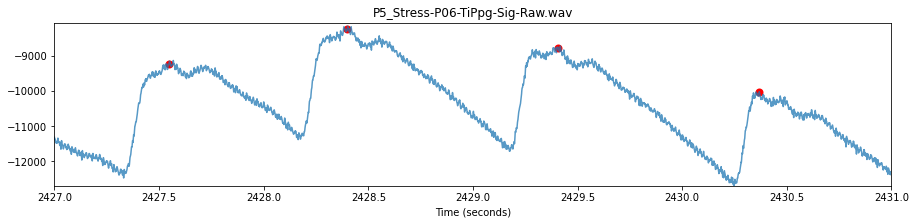

In [24]:
st = 2427
en = 2431
plt.figure(figsize=(15,3))
plt.plot(ppg_time[st*ppg_fs:en*ppg_fs], ppg_signal[st*ppg_fs:en*ppg_fs], alpha=0.75)
plt.scatter(SP, ppg_signal[np.round(SP*ppg_fs).astype(int)],color="red", linewidth=2)
plt.title(os.path.basename(wav_file_paths[0]))
plt.xlabel("Time (seconds)")
plt.xlim([st, en])
plt.ylim([np.min(ppg_signal[st*ppg_fs:en*ppg_fs]), np.max(ppg_signal[st*ppg_fs:en*ppg_fs]) + 100])

(-16445.0, -9806.0)

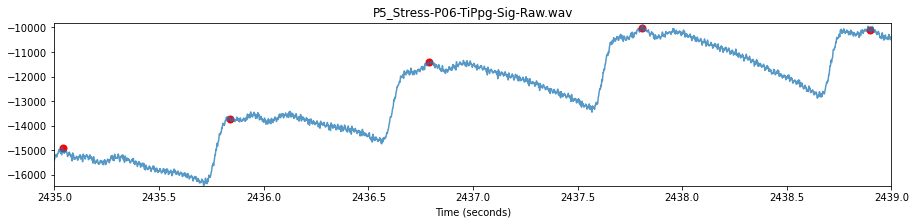

In [25]:
st = 2435
en = 2439
plt.figure(figsize=(15,3))
plt.plot(ppg_time[st*ppg_fs:en*ppg_fs], ppg_signal[st*ppg_fs:en*ppg_fs], alpha=0.75)
plt.scatter(SP, ppg_signal[np.round(SP*ppg_fs).astype(int)],color="red", linewidth=2)
plt.title(os.path.basename(wav_file_paths[0]))
plt.xlabel("Time (seconds)")
plt.xlim([st, en])
plt.ylim([np.min(ppg_signal[st*ppg_fs:en*ppg_fs]), np.max(ppg_signal[st*ppg_fs:en*ppg_fs]) + 100])

In [33]:
repo_name = "p5-stress-classifier"
submodule_parent_dir = "lib"
submodule_name = "Neurokit"

repo_path = os.getcwd()
base_dir = os.path.basename(repo_path)
while base_dir != repo_name:
    repo_path = os.path.dirname(os.path.abspath(repo_path))
    base_dir = os.path.basename(repo_path)
    
submodule_path = os.path.join(repo_path, submodule_parent_dir, submodule_name)

sys.path.append(submodule_path)

import neurokit2 as nk

In [41]:
st = 2435
en = 2439
st = st - 10
en = en + 10
processed = nk.ppg_process(ppg_signal[st*ppg_fs:en*ppg_fs])
#processed = nk.ppg_process(signal)

(2435.0, 2439.0)

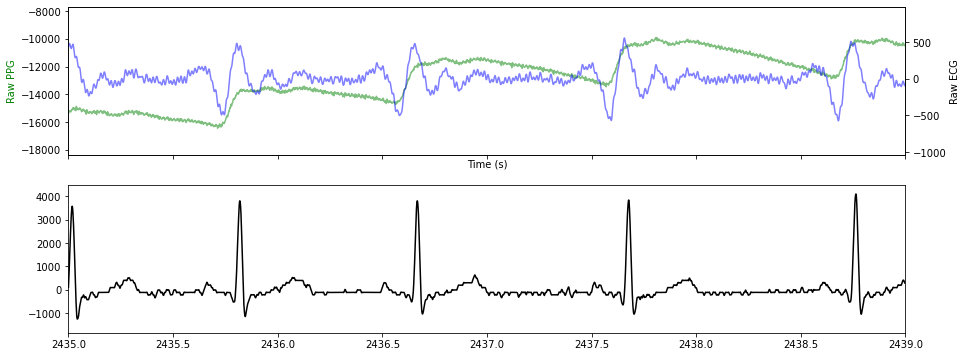

In [42]:
# plt.figure(figsize=(15,3))
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(15, 6), sharex=True)

ax2 = ax1.twinx()
processed_no_outliers = processed[0]["PPG_Clean"].values
processed_no_outliers[nk.find_outliers(processed_no_outliers)] = np.mean(
    processed_no_outliers
)
ax1.plot(
    ppg_time[st * ppg_fs : en * ppg_fs],
    ppg_signal[st * ppg_fs : en * ppg_fs],
    "g",
    alpha=0.5,
)
ax2.plot(ppg_time[st * ppg_fs : en * ppg_fs], processed_no_outliers, "b", alpha=0.5)
ax3.plot(
    ecg_time[st * ecg_fs : en * ecg_fs], ecg_signal[st * ecg_fs : en * ecg_fs], "black"
)
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Raw PPG", color="g")
ax2.set_ylabel("Clean PPG", color="b")
ax2.set_ylabel("Raw ECG", color="black")

plt.xlim([st + 10, en - 10])

In [ ]:
filtered = nk.signal_filter(signal = signal[st*fs:en*fs], lowcut=0.5, highcut=10)

In [ ]:
#plt.figure(figsize=(15,3))
fig, ax1 = plt.subplots(figsize=(15,3))

ax2 = ax1.twinx()
#filtered = processed[0]["PPG_Clean"].values
#processed_no_outliers[nk.find_outliers(processed_no_outliers)] = np.mean(processed_no_outliers)
ax1.plot(time[st*fs:en*fs], signal[st*fs:en*fs], 'g', alpha=0.5)
ax2.plot(time[st*fs:en*fs], filtered, 'b', alpha=0.5)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Raw PPG', color='g')
ax2.set_ylabel('Filtered PPG', color='b')
plt.xlim([st+10, en - 10])